<a href="https://colab.research.google.com/github/Regina-Arthur/Coding-Practice-Projects/blob/main/Stanford_Computer_Vision/Notes/Recurrent_Neural_Network_and_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Lecture 7 and 8: *Recurrent Neural Network and Transformers***

**Recurrent Neural Network**


**What is a Recurrent Neural Network (RNN)?**

A Recurrent Neural Network (RNN) is a type of neural network designed to process sequential data of varying lengths. Unlike feedforward networks or convolutional networks, which assume that inputs are single data points that provide all the information needed, RNNs explicitly account for the fact that a data can have a temporal or sequential structure(each data with in such a dataset is a group of individual data that need to be stack together in a particular order in order to provide a particular information). Examples of such data include time series (like stock prices or weather measurements), language (sentences and paragraphs), audio signals, and even video frames.

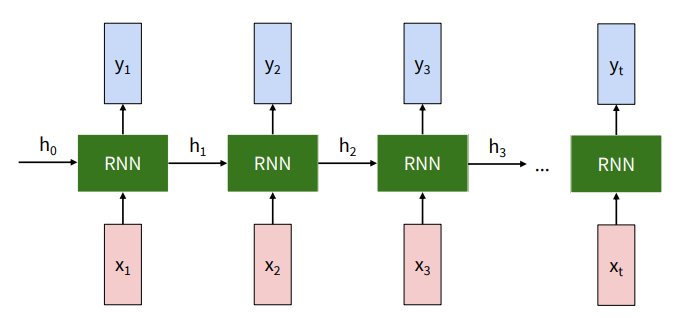


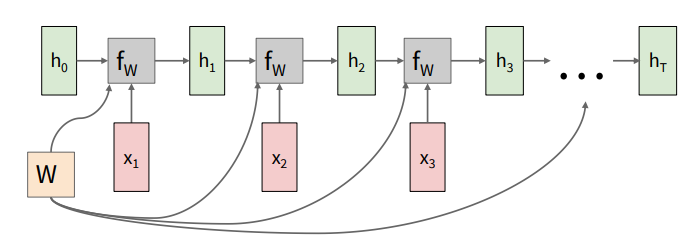

*This shows that the same weight will be used during the encoder stage. This ensures the rnn has less parameters*

**The Recurrent Neural Network Process Explained**

In an RNN, a sequence is broken down into discrete time steps. Each time step corresponds to one unit of the sequence; this could be a word in a sentence, a note in a melody, or in the case of video, a frame or a feature representation of that frame.

Time steps can be thought of in two ways: natural and artificial. Natural time steps are those that inherently exist in the data, such as the chronological progression of video frames. Artificial time steps, on the other hand, arise when we impose a sequential order on data that might not have an obvious temporal flow, for example, when we divide a long frame into patches and feed them in sequence to mimic progression. In both cases, the data is encoded per time step, meaning that at each step the model receives a fixed-length vector representation of the current element in the sequence(The data is converted to a numerical form that the model can work with(encoded)).

Once the representation of the data at a given time step is fed into the RNN, the model does not just process it in isolation. Instead, it combines the new input with an internal representation known as the state(hidden state, which is also know as an encoder because of how it works), which summarizes everything the model has learned from previous steps with the current step. This state is updated at each time step, evolving as more elements of the sequence are observed. The state serves as a kind of memory, allowing the model to retain information about earlier points in the sequence while integrating it with new inputs. Thus, the state embodies the relationship between different data points across the sequence, capturing patterns such as temporal dependencies, motion dynamics, or context buildup.

Depending on the nature of the task, the RNN can generate outputs in different ways. For tasks like video captioning, it is common to produce an output at every time step. After each new state is calculated, the model predicts a word that corresponds to the content of that segment of the video. These outputs are stored, and the state itself is passed on to the next time step so that the model’s predictions remain consistent and temporally aware. In other scenarios, such as sequence classification, the model might choose not to produce intermediate outputs. Instead, it waits until the entire sequence has been processed, then uses the final state to generate a decoder state which is suppose to store the relationship between the input and the output we are going to predict. For example, labeling a video clip as “running,” “dancing,” or “cooking.” This process is dependent on the designer. The output is called a decoder because it derives meaning out of the encoder.

**Types of Problem Styles Recurrent Neural Networks work for**

One to Many

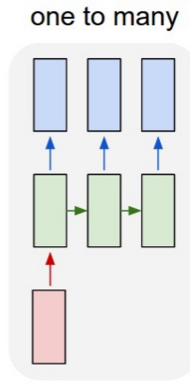

    In a one-to-many problem, the network takes a single input and generates
    a sequence as its output. The idea is that the initial input provides a
    starting point or condition, and then the RNN unfolds through time to
    produce multiple outputs step by step.
    A good example is image captioning. The network begins with a single
    input image. A feature extractor such as a CNN encodes the image into a
    vector, which is then fed into an RNN. The RNN, conditioned on this image
    representation, generates a sequence of words that form a
    natural-language caption describing the image. Here, the single input is
    the image, and the multiple outputs are the words in the caption.

Many to One

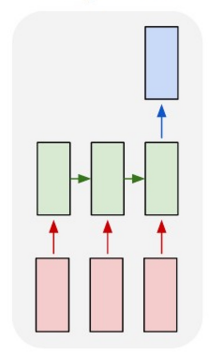

    In a many-to-one problem, the network processes an entire sequence of
    inputs but produces a single output at the end. In this setup, the RNN
    reads the sequence step by step, updating its hidden state as it goes.
    Once the full sequence has been processed, the final hidden state serves
    as a summary of the whole sequence, and this representation is used to
    generate a single prediction.
    A common application is sentiment analysis. Given a video, the RNN
    processes each frame in turn and encodes the contextual
    meaning into its hidden state. After the last frame is processed, the
    model produces a single output such as a classification label: positive,
    negative, or neutral.

Many to Many

    In a many-to-many problem, both the input and the output are sequences.
    However, the relationship between them can take two forms. In some cases,
    the input and output sequences are aligned in time, meaning each input
    corresponds to an output at the same step. In other cases, the sequences
    differ in length, where the network must first process the entire input
    sequence before producing an output sequence.

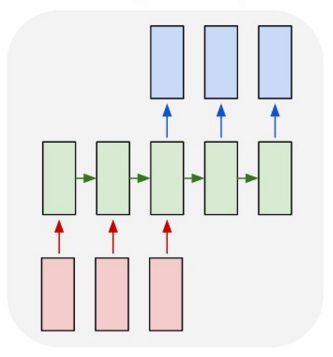


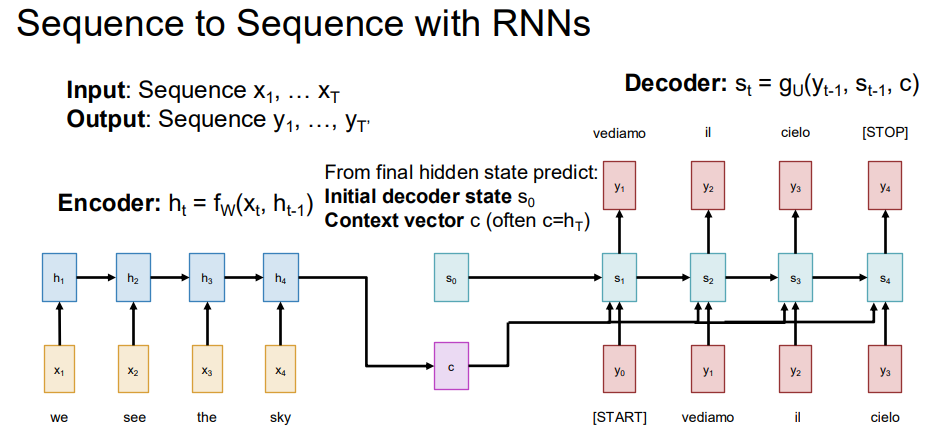



    The unaligned many-to-many setup is typically used in tasks like video
    caption also. Here, the RNN reads the entire frames in the video and then
    generates a sequence of captions after.
    The input and output sequences may have different lengths, and the RNN
    must learn to encode the meaning of the video frames before decoding
    it into the captions.
    

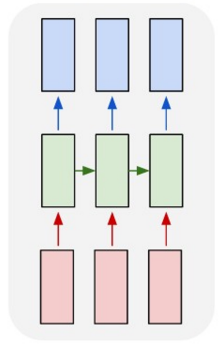

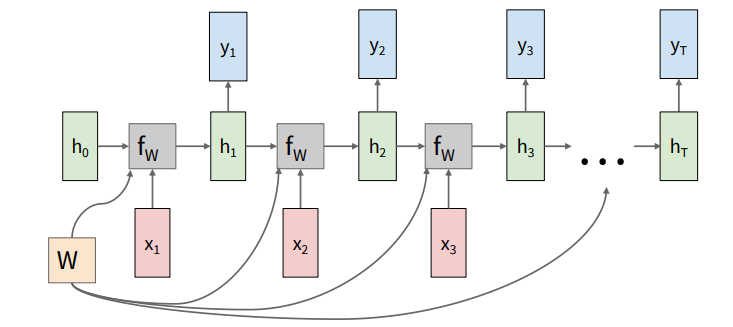



    The time-aligned many-to-many setup is often used in sequence labeling
    tasks, such as video captioning.
    Each frame in a video is an input, and the model outputs a caption for
    that same frame.

**Mathematical Representation of the Process Without a Non-linearity**

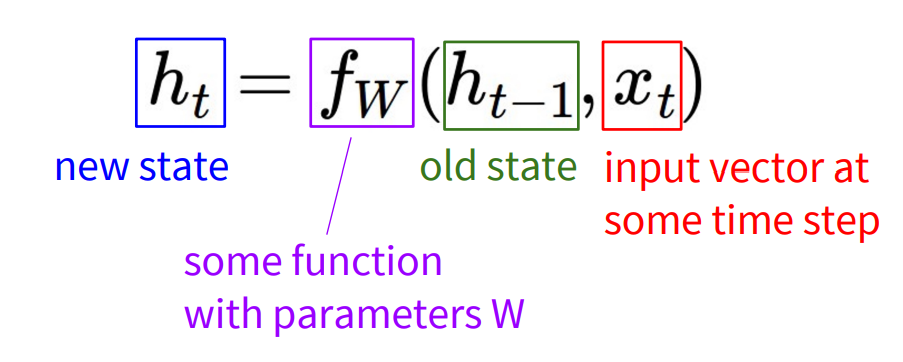


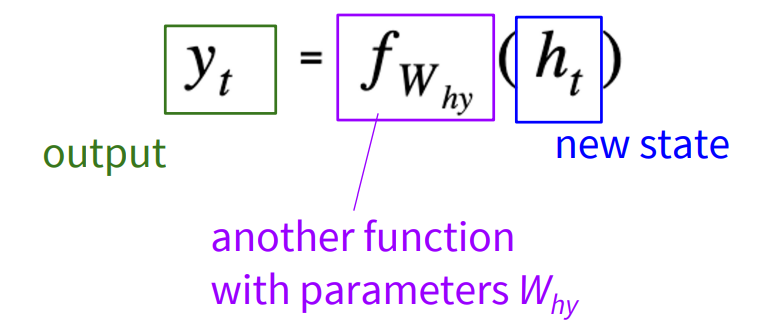

**Taking an example where predictions are made after the last hidden state**

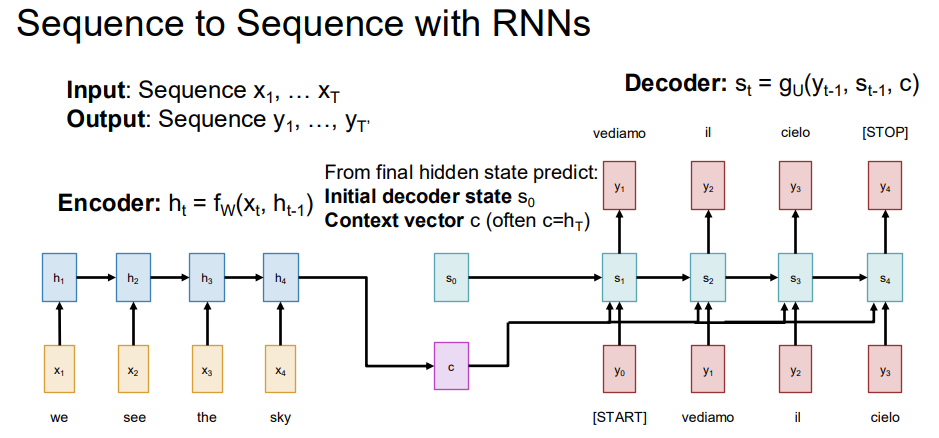

**Explanation for the example above**

The input data points are fed into the model sequentially.
When x1 enters the model, it first passes through the encoder, which computes its hidden state h1 using an initial hidden state (usually initialized to zeros). Next, x2 is fed in, and the encoder updates its hidden state to h2 using both x2 and the previous hidden state h1. This process continues until the final input x4 is processed, producing the final hidden state h4.

The last hidden state h4 is treated as the context vector, denoted as c, which summarizes all the relevant information from the input sequence.
This context vector is then passed to the decoder, which generates the output sequence step by step.

Initially, the decoder takes in the context vector c, an initial decoder hidden state, and a special start token to produce the first decoder hidden state and the first predicted output. The predicted output is then fed back into the decoder (along with the context vector and the previous decoder state) to generate the next output. This process repeats until the entire output sequence is generated.

In essence, the context vector must capture all the important information about the input sequence, since it acts as the bridge that connects the encoder (input understanding) and the decoder (output generation).

**How The Loss is Calculated**

Basically, we calculate the loss for each output and then find the average. This averaged loss is then used to update the model’s parameters during backpropagation.

The exact process depends on how the output is derived.

For aligned many to many

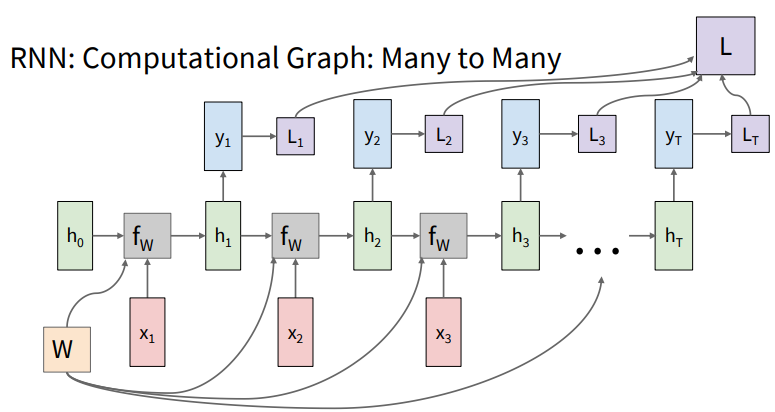


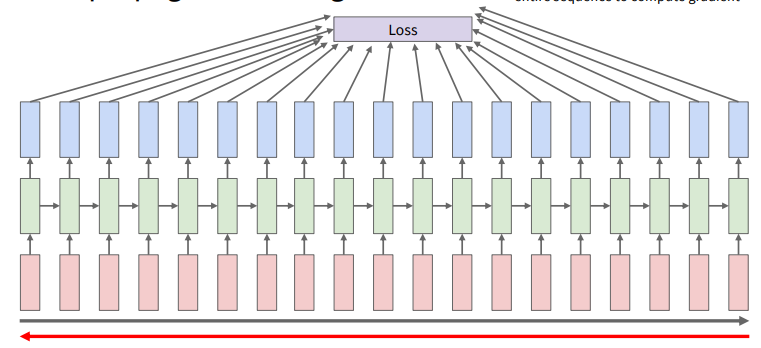





**Chunking**


**Advantages of RNN**

* RNNs can handle variable-length sequences. Unlike models that require fixed-size inputs and outputs, RNNs can process sequences of different lengths because they process data one time step at a time.

* The parameters of the RNN are shared across all time steps, which greatly reduces the number of parameters compared to having a separate model for each step. This weight sharing allows RNNs to generalize better across different positions in a sequence and helps them learn temporal consistency.

**Disadvantages of RNN**

* One of the most well-known drawbacks is the problem of vanishing and exploding gradients. During training, when errors are propagated backward through time, the gradients used to update weights can become extremely small or excessively large. When gradients vanish, the model struggles to learn long-term dependencies, meaning it can only remember information from a few recent time steps and forgets earlier context. Conversely, when gradients explode, training becomes unstable as weights are updated erratically. These issues make it difficult for standard RNNs to capture long-range relationships, which are often crucial in complex sequences like videos or long sentences.

* RNNs process data sequentially, which limits their efficiency. Since each time step depends on the previous one, computations cannot be easily parallelized. This makes training RNNs slower compared to architectures like Convolutional Neural Networks (CNNs) or Transformers, which can process multiple elements simultaneously.

* RNNs tend to be sensitive to the order and length of sequences, which can make them harder to train effectively, especially when the input sequences vary widely in duration or contain irrelevant information.

* RNNs often struggle with maintaining memory over very long sequences. While architectures such as Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) were introduced to address this limitation, plain RNNs remain limited in their ability to store context over extended periods.

**Code Representation of the Process**

**Pytorch**

**For RNN**

    RNN
    class torch.nn.RNN(input_size, hidden_size, num_layers=1,
    nonlinearity='tanh', bias=True, batch_first=False, dropout=0.0,
    bidirectional=False, device=None, dtype=None)


    Parameters

    input_size – The number of expected features in the input x

    hidden_size – The number of features in the hidden state h

    num_layers – Number of recurrent layers. E.g., setting num_layers=2
    would mean stacking two RNNs together to form a stacked RNN, with the
    second RNN taking in outputs of the first RNN and computing the final
    results. Default: 1

    nonlinearity – The non-linearity to use. Can be either 'tanh' or
    'relu'. Default: 'tanh'

    bias – If False, then the layer does not use bias weights b_ih and
    b_hh. Default: True

    batch_first – If True, then the input and output tensors are provided
    as (batch, seq, feature) instead of (seq, batch, feature). Note that
    this does not apply to hidden or cell states. See the Inputs/Outputs
    sections below for details. Default: False

    dropout – If non-zero, introduces a Dropout layer on the outputs of
    each RNN layer except the last layer, with dropout probability equal to
    dropout. Default: 0

    bidirectional – If True, becomes a bidirectional RNN. Default: False


    RNNCell
    
    class torch.nn.RNNCell(input_size, hidden_size, bias=True,
    nonlinearity='tanh', device=None, dtype=None)

    Parameters

    input_size (int) – The number of expected features in the input x

    hidden_size (int) – The number of features in the hidden state h

    bias (bool) – If False, then the layer does not use bias weights b_ih
    and b_hh. Default: True

    nonlinearity (str) – The non-linearity to use. Can be either 'tanh' or
    'relu'. Default: 'tanh'




**For GRU**

    GRU
    class torch.nn.GRU(input_size, hidden_size, num_layers=1, bias=True,
    batch_first=False, dropout=0.0, bidirectional=False, device=None,
    dtype=None)


    Parameters

    input_size – The number of expected features in the input x

    hidden_size – The number of features in the hidden state h

    num_layers – Number of recurrent layers. E.g., setting num_layers=2 would
    mean stacking two GRUs together to form a stacked GRU, with the second
    GRU taking in outputs of the first GRU and computing the final results.
    Default: 1

    bias – If False, then the layer does not use bias weights b_ih and b_hh.
    Default: True

    batch_first – If True, then the input and output tensors are provided as
    (batch, seq, feature) instead of (seq, batch, feature). Note that this
    does not apply to hidden or cell states. See the Inputs/Outputs sections
    below for details. Default: False

    dropout – If non-zero, introduces a Dropout layer on the outputs of each
    GRU layer except the last layer, with dropout probability equal to
    dropout. Default: 0

    bidirectional – If True, becomes a bidirectional GRU. Default: False


    GRUCell

    class torch.nn.GRUCell(input_size, hidden_size, bias=True, device=None,
    dtype=None)

    Parameters

    input_size (int) – The number of expected features in the input x

    hidden_size (int) – The number of features in the hidden state h

    bias (bool) – If False, then the layer does not use bias weights b_ih and
    b_hh. Default: True



**For LSTM**

    LSTM
    class torch.nn.LSTM(input_size, hidden_size, num_layers=1, bias=True,
    batch_first=False, dropout=0.0, bidirectional=False, proj_size=0,
    device=None, dtype=None)

    Parameters

    input_size – The number of expected features in the input x

    hidden_size – The number of features in the hidden state h

    num_layers – Number of recurrent layers. E.g., setting num_layers=2 would
    mean stacking two LSTMs together to form a stacked LSTM, with the second
    LSTM taking in outputs of the first LSTM and computing the final results.
    Default: 1

    bias – If False, then the layer does not use bias weights b_ih and b_hh.
    Default: True

    batch_first – If True, then the input and output tensors are provided as
    (batch, seq, feature) instead of (seq, batch, feature). Note that this
    does not apply to hidden or cell states. See the Inputs/Outputs sections
    below for details. Default: False

    dropout – If non-zero, introduces a Dropout layer on the outputs of each
    LSTM layer except the last layer, with dropout probability equal to
    dropout. Default: 0

    bidirectional – If True, becomes a bidirectional LSTM. Default: False

    proj_size – If > 0, will use LSTM with projections of corresponding size.
    Default: 0


    LSTMCell
    class torch.nn.LSTMCell(input_size, hidden_size, bias=True, device=None,
    dtype=None)

    Parameters

    input_size (int) – The number of expected features in the input x

    hidden_size (int) – The number of features in the hidden state h

    bias (bool) – If False, then the layer does not use bias weights b_ih and
    b_hh. Default: True

**Improvements To Make RNNs Work For Long Sequences**

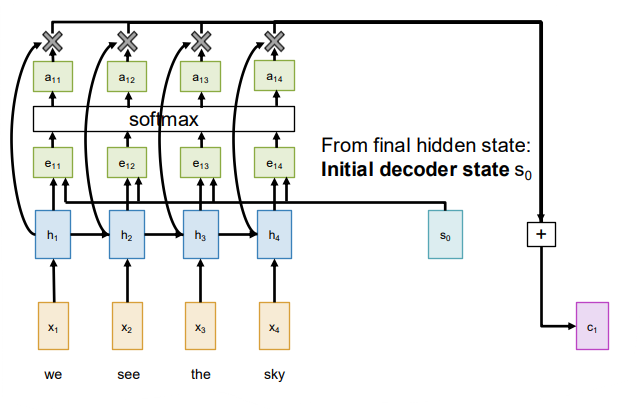

**Attention**

It is a fundamental building block in the transformer architecture.

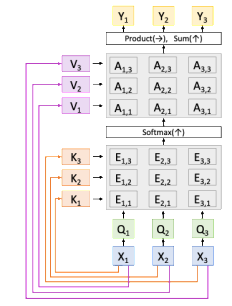

**Transformer**

**What is a Transformer?**

A transformer is a neural network architecture build upon the knowledge gained from recurrent neural networks. It makes use of something called attention within it's layers.

  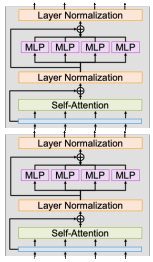